In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
engagement_df = pd.read_csv('takehome_user_engagement.csv')
users_df = pd.read_csv('takehome_users.csv', encoding='latin1')

In [3]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# Adopted User Definition

Adopted user definition: A user that has logged onto the product on three separate days in at least a seven day period
Steps:
-  Create dataframe to count number of times user used product
-  Create column in user dataframe that shows difference in account creation time to last use time
-  Merge Dataframe
-  Explore Data
-  Models to Predict Adopted Users

In [5]:
# create engagement count dataframe

# emtpy dictionary for engagement counts
engagement_counts = {}

# loop over each row to get each log-in instance
for index,row in engagement_df.iterrows():
    if row['user_id'] in engagement_counts:
        engagement_counts[row['user_id']] += 1
    else:
        engagement_counts[row['user_id']] = 1

# convert to dataframe
engagement_counts_df = pd.DataFrame.from_dict(engagement_counts, orient='index')
engagement_counts_df.columns= ['visit_count']
engagement_counts_df = engagement_counts_df.reset_index(drop=False)
engagement_counts_df.columns=['user_id', 'visit_count']
engagement_counts_df.head()

,user_id,visit_count
0,1,1
1,2,14
2,3,1
3,4,1
4,5,1


In [6]:
# create time difference column for user dataframe

users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'], unit='s')
users_df['creation_time'] = pd.to_datetime(users_df.creation_time)
users_df['creation_time_difference'] = users_df['last_session_creation_time'].sub(users_df['creation_time'], axis=0)
users_df['creation_time_difference'] = users_df['creation_time_difference'] / np.timedelta64(1, 'D')
users_df.rename(columns={'object_id': 'user_id'}, inplace=True)
users_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_difference
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.000347
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136.000046
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.000602
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.000324
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.000231


In [7]:
# merge dataframes on user id

final_df = users_df.merge(engagement_counts_df, how='left', on='user_id')
final_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_difference,visit_count
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.000347,1.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136.000046,14.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.000602,1.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.000324,1.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.000231,1.0


In [8]:
# definte adopted user column

final_df['adopted_user'] = (final_df['creation_time_difference'] > 7) & (final_df['visit_count'] > 3)
final_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_difference,visit_count,adopted_user
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.000347,1.0,False
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136.000046,14.0,True
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.000602,1.0,False
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.000324,1.0,False
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.000231,1.0,False


# Data Exploration

In [9]:
adopted_user_percentage = len(final_df[final_df['adopted_user'] == True]) / len(final_df)
print('Adopted User Percentage: {0}'.format(adopted_user_percentage))

Adopted User Percentage: 0.16725


In [10]:
final_df.shape

(12000, 13)

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
creation_time_difference      8823 non-null float64
visit_count                   8823 non-null float64
adopted_user                  12000 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(3), int64(4), object(3)
memory usage: 1.2+ MB


In [12]:
final_df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [13]:
creation_source_dict = {'ORG_INVITE': 0, 'GUEST_INVITE': 1, 'PERSONAL_PROJECTS': 2, 'SIGNUP': 3, 'SIGNUP_GOOGLE_AUTH': 4}

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


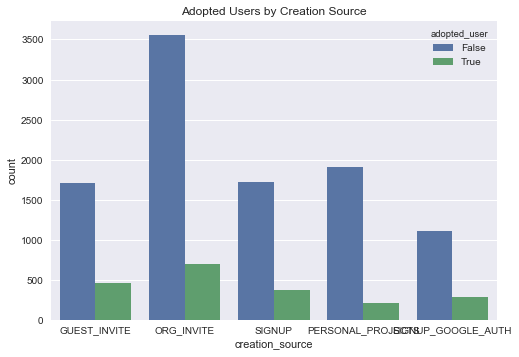

In [14]:
sb.countplot(x='creation_source', hue='adopted_user', data=final_df)
plt.title('Adopted Users by Creation Source')
plt.show()

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


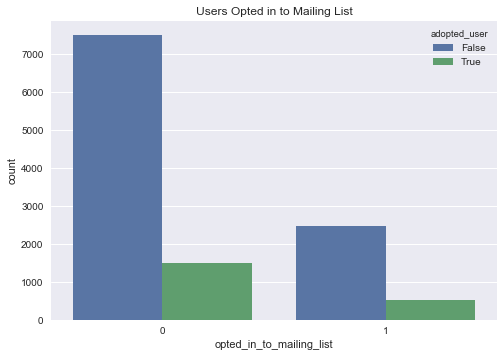

In [15]:
sb.countplot(x='opted_in_to_mailing_list', hue='adopted_user', data=final_df)
plt.title('Users Opted in to Mailing List')
plt.show()

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


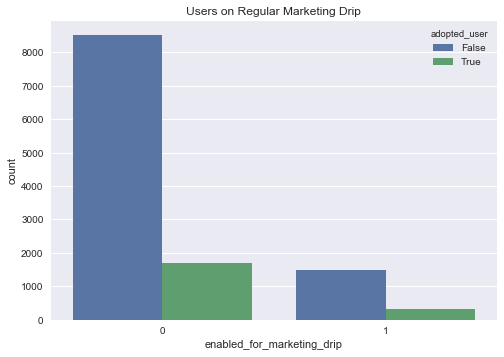

In [16]:
sb.countplot(x='enabled_for_marketing_drip', hue='adopted_user', data=final_df)
plt.title('Users on Regular Marketing Drip')
plt.show()

# Findings

Key Findings:
-  Only 16.7% of the data contains adopted users
-  Most common creation source for adopted users is through their own organization's invite
-  Majority of adopted users did not opt in to the mailing list or were on regular marketing drip

Modeling Approach:

Since we know that the number of times used and the duration between the first and last time **defines** an adopted user, we would not gain much inference in including those two columns as features in our predictive model. The real question that we have here is: What is driving users to use the product more and for longer periods of time? The key columns that we can develop insights from are the creation source, whether or not they were opted in to the mailing list and if they were part of the regular marketing drip.

However our data does not contain enough adopted user instances to get a good enough insight on whether or not those drive user adoption. With that said, I do not expect us to infer much from the following models that will predict user adoption.

In [17]:
columns_to_drop = ['user_id', 'creation_time', 'name', 'email', 'last_session_creation_time', 'org_id', 'invited_by_user_id', 'creation_time_difference', 'visit_count']
prediction_df = final_df.drop(columns_to_drop, axis=1)
prediction_df['creation_source'] = prediction_df['creation_source'].replace(creation_source_dict)

prediction_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user
0,1,1,0,False
1,0,0,0,True
2,0,0,0,False
3,1,0,0,False
4,1,0,0,False


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# split out into train and test

array = prediction_df.values

X = array[:,0:3]
y = array[:,3].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [20]:
num_folds=10
seed=7
scoring='roc_auc'

models=[]
models.append(('LR', LogisticRegression()))
models.append(('KN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.498134 (0.021703)
KN: 0.514015 (0.019954)
CART: 0.559787 (0.015019)


In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))

ensemble_results = []
ensemble_names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    ensemble_results.append(cv_results)
    ensemble_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

AB: 0.566213 (0.017153)
GBM: 0.560542 (0.016162)


In [23]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1988    0]
 [ 412    0]]
             precision    recall  f1-score   support

          0       0.83      1.00      0.91      1988
          1       0.00      0.00      0.00       412

avg / total       0.69      0.83      0.75      2400



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Conclusion

As expected, we were not able to gain much inference due to the lack of adopted user instances. Our boosted model -  which reassigns weights to data points that were misclassified - still predicted non-adopted user for each testing instance. For a more robust model - more instances with adopted users would be ideal.

However moving forward, there are a couple takeaways from the data exploration that the company could move forward with:
-  The majority of adopted users seen here were not on the mailing list or part of the regular marketing drip, which means that these two avenues of company outreach may not be worth continuing
-  The most common source of creation between adopted users was through organization invite, this could be a cue to hone in on outreach within an individual user's organization to develop more user adoption.